In [8]:
import math
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization

from sklearn import preprocessing
from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn.metrics import accuracy_score as accuracy

def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

Data = pd.read_csv('df_after.csv')

df = pd.DataFrame(Data, columns = ['RegionName', 'State_x','Date', 'Price', 'Housing Inventory', 'UnemploymentRate',
                                   'cases', 'cases_rate', 'deaths', 'death_rate', 'fully_vaccinated', 'fully_vaccinated_rate'])
df = df.loc[:1333]
df.dropna(inplace = True)

df.head(10000)

,RegionName,State_x,Date,Price,Housing Inventory,UnemploymentRate,cases,cases_rate,deaths,death_rate,fully_vaccinated,fully_vaccinated_rate
0,Los Angeles County,CA,2020-02,652904.0,9084.0,4.3,105.0,0.000010,0.0,0.000000e+00,0.0,0.000000
1,San Diego County,CA,2020-02,611465.0,4092.0,3.2,16.0,0.000005,0.0,0.000000e+00,0.0,0.000000
2,Orange County,CA,2020-02,755993.0,3975.0,2.8,56.0,0.000017,0.0,0.000000e+00,0.0,0.000000
3,Riverside County,CA,2020-02,402564.0,6674.0,4.0,15.0,0.000006,0.0,0.000000e+00,0.0,0.000000
4,San Bernardino County,CA,2020-02,363191.0,5078.0,3.7,23.0,0.000010,1.0,4.509790e-07,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1329,Mono County,CA,2021-12,594271.0,33.0,4.4,317.0,0.022706,0.0,0.000000e+00,952.0,0.068190
1330,Trinity County,CA,2021-12,347825.0,114.0,4.6,20.0,0.001498,1.0,7.488393e-05,368.0,0.027557
1331,Modoc County,CA,2021-12,163302.0,43.0,5.1,16.0,0.001689,0.0,0.000000e+00,170.0,0.017942
1332,Sierra County,CA,2021-12,314431.0,20.0,4.0,18.0,0.005778,0.0,0.000000e+00,72.0,0.023114


In [9]:
Data = pd.read_csv('df_sup.csv')
df_sup = pd.DataFrame(Data, columns = ['Name', 'Population', 'Area', 'GDP', 'GDPpp'])


for idx, row in df_sup.iterrows():
    df.loc[df['RegionName'] == row.Name, 'Population'] = row.Population
    df.loc[df['RegionName'] == row.Name, 'Area'] = row.Area
    df.loc[df['RegionName'] == row.Name, 'GDP'] = row.GDP
    df.loc[df['RegionName'] == row.Name, 'GDPpp'] = row.GDPpp

df['Population'] = pd.to_numeric(df['Population'].str.replace(',', ''))
df['Area'] = pd.to_numeric(df['Area'].str.replace(',', ''))
df['GDP'] = pd.to_numeric(df['GDP'].str.replace(',', ''))

df.head(100)

,RegionName,State_x,Date,Price,Housing Inventory,UnemploymentRate,cases,cases_rate,deaths,death_rate,fully_vaccinated,fully_vaccinated_rate,Population,Area,GDP,GDPpp
0,Los Angeles County,CA,2020-02,652904.0,9084.0,4.3,105.0,0.000010,0.0,0.000000e+00,0.0,0.0,9829544,4060,662418536,67.390566
1,San Diego County,CA,2020-02,611465.0,4092.0,3.2,16.0,0.000005,0.0,0.000000e+00,0.0,0.0,3286069,4204,203932550,62.059729
2,Orange County,CA,2020-02,755993.0,3975.0,2.8,56.0,0.000017,0.0,0.000000e+00,0.0,0.0,3167809,948,220075102,69.472339
3,Riverside County,CA,2020-02,402564.0,6674.0,4.0,15.0,0.000006,0.0,0.000000e+00,0.0,0.0,2458395,7208,75327830,30.641061
4,San Bernardino County,CA,2020-02,363191.0,5078.0,3.7,23.0,0.000010,1.0,4.509790e-07,0.0,0.0,2194710,20062,78146465,35.606738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Yuba County,CA,2020-03,294633.0,238.0,7.9,9.0,0.000114,0.0,0.000000e+00,0.0,0.0,83421,630,2948046,35.339375
97,Lake County,CA,2020-03,246632.0,490.0,6.6,1.0,0.000015,0.0,0.000000e+00,0.0,0.0,68766,1258,1768943,25.724093
98,Tehama County,CA,2020-03,245124.0,350.0,6.9,1.0,0.000015,0.0,0.000000e+00,0.0,0.0,65498,2951,1882273,28.737870
100,San Benito County,CA,2020-03,646735.0,114.0,7.0,30.0,0.000469,1.0,1.561963e-05,0.0,0.0,66677,1389,2075377,31.125830


In [10]:
print(df.isnull().sum())
print(df.dtypes)


RegionName               0
State_x                  0
Date                     0
Price                    0
Housing Inventory        0
UnemploymentRate         0
cases                    0
cases_rate               0
deaths                   0
death_rate               0
fully_vaccinated         0
fully_vaccinated_rate    0
Population               0
Area                     0
GDP                      0
GDPpp                    0
dtype: int64
RegionName                object
State_x                   object
Date                      object
Price                    float64
Housing Inventory        float64
UnemploymentRate         float64
cases                    float64
cases_rate               float64
deaths                   float64
death_rate               float64
fully_vaccinated         float64
fully_vaccinated_rate    float64
Population                 int64
Area                       int64
GDP                        int64
GDPpp                    float64
dtype: object


In [11]:
X_var = df[['Housing Inventory', 'UnemploymentRate', 'cases_rate', 'death_rate', 'fully_vaccinated_rate', 'Population', 'Area', 'GDP', 'GDPpp']].values
y_var = df['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print('X_train samples : \n', X_train[100:105])
print('X_test samples : \n', X_test[100:105])
print('y_train samples : ', y_train[100:105])
print('y_test samples : ', y_test[100:105])

X_train samples : 
 [[2.20000000e+02 1.09000000e+01 5.23250523e-04 0.00000000e+00
  0.00000000e+00 4.41180000e+04 6.28700000e+03 1.54684800e+06
  3.50616075e+01]
 [4.30000000e+01 5.70000000e+00 1.64474712e-02 7.80981538e-05
  8.14563744e-02 6.66770000e+04 1.38900000e+03 2.07537700e+06
  3.11258305e+01]
 [8.55000000e+02 7.70000000e+00 9.02999050e-03 1.26910069e-04
  6.41884004e-02 1.01358100e+06 5.96300000e+03 3.99215810e+07
  3.93866706e+01]
 [1.34600000e+03 1.51000000e+01 4.48237607e-04 2.24118804e-05
  0.00000000e+00 1.16141300e+06 7.20000000e+02 7.18780330e+07
  6.18884350e+01]
 [1.59000000e+02 6.90000000e+00 1.30284706e-02 0.00000000e+00
  0.00000000e+00 4.12590000e+04 6.06000000e+02 1.57043100e+06
  3.80627499e+01]]
X_test samples : 
 [[8.78000000e+02 5.00000000e+00 6.47778724e-03 3.92253553e-05
  5.19590263e-02 8.15201000e+05 4.70000000e+01 1.55258114e+08
  1.90453783e+02]
 [8.31000000e+02 8.20000000e+00 2.12769145e-03 4.24539375e-05
  0.00000000e+00 4.12300000e+05 1.40700000e+03

In [13]:
# 1. Linear Regression

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.05)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

# en = ElasticNet(alpha = 0.01)
# en.fit(X_train, y_train)
# en_yhat = en.predict(X_test)

# 6. Random Forest Regressor

dt = RandomForestRegressor(criterion='mae',n_jobs=-1, n_estimators=10,max_depth=6, min_samples_leaf=1, random_state=3)
dt.fit(X_train, y_train)
dt_yhat = dt.predict(X_test)


C:\Users\hkang\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.19932e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\hkang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12588303332847.295, tolerance: 10227068698.899462
  positive)
C:\Users\hkang\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12626104964861.781, tolerance: 10227068698.899462
  positive)


In [14]:
# 1. Explained Variance Score

print('EXPLAINED VARIANCE SCORE:')
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Linear Regression model is {}'.format(evs(y_test, ols_yhat)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)))
print('-------------------------------------------------------------------------------')
# print('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)))
# print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Random Forest Regression is {}'.format(evs(y_test, dt_yhat)))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of Linear Regression model is 0.7675458658353211
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.7676470133716222
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.7675492008997152
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.4729204024088458
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.7675076738886768
-------------------------------------------------------------------------------
Explained Variance Score of Random Forest Regression is 0.9716267830424177
-------------------------------------------------------------------------------


In [15]:
# 2. R-squared

print('R-SQUARED:')
print('-------------------------------------------------------------------------------')
print('R-Squared of Linear Regression model is {}'.format(r2(y_test, ols_yhat)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)))
print('-------------------------------------------------------------------------------')
# print('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)))
# print('-------------------------------------------------------------------------------')
print('R-Squared of Random Forest Regression is {}'.format(evs(y_test, dt_yhat)))
print('-------------------------------------------------------------------------------')


R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of Linear Regression model is 0.7672161667971833
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.7673210452886996
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.7672195154733101
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.46840920384963014
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.7671620174133731
-------------------------------------------------------------------------------
R-Squared of Random Forest Regression is 0.9716267830424177
-------------------------------------------------------------------------------


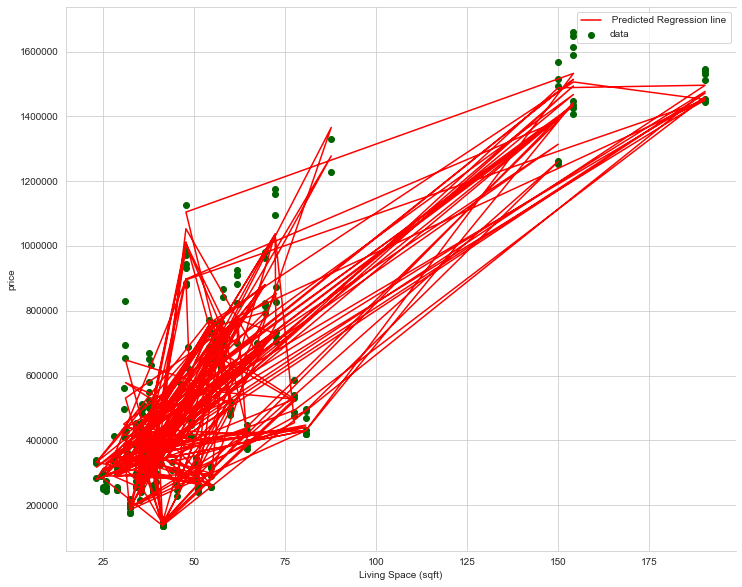

In [16]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(X_test[:,8], y_test, color= 'darkgreen', label = 'data')
plt.plot(X_test[:,8], dt.predict(X_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
